## TASK:3 EDA on SampleSuperstore


### Author Abhishek katroliya
### Copyright by Abhishek katroliya 202

### 1: import all necessary libraty

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

### 2: Understand the dataset

In [5]:
mydata=pd.read_csv('SampleSuperstore.csv')
mydata.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
mydata.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
mydata.shape

(9994, 13)

In [8]:
mydata.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [9]:
mydata.info

<bound method DataFrame.info of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code R

In [10]:
mydata.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
#finding unique value
mydata.apply(lambda x:len(x.unique()))

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [12]:
mydata.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

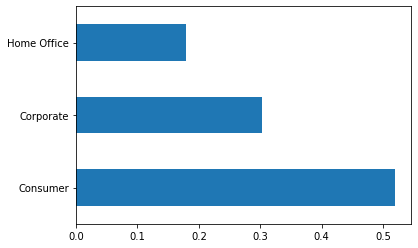

In [13]:
mydata.Segment.value_counts(normalize= True).plot.barh()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000220B379D408>,
      dtype=object)

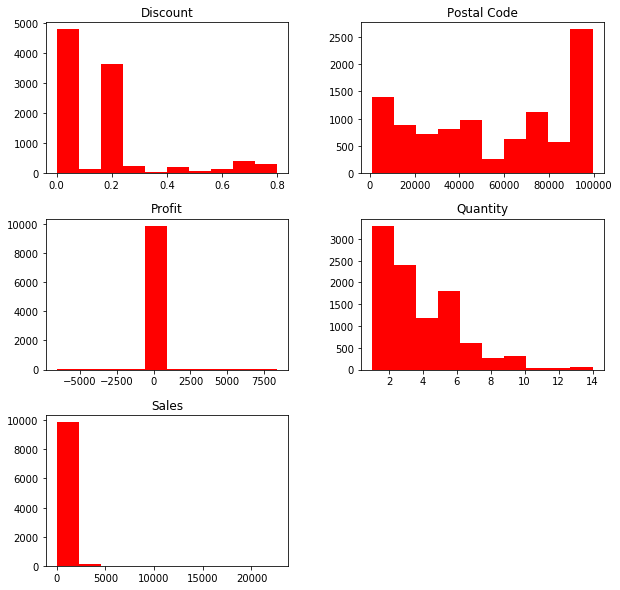

In [14]:
mydata.hist(figsize=(10,10), color='Red',grid=False)

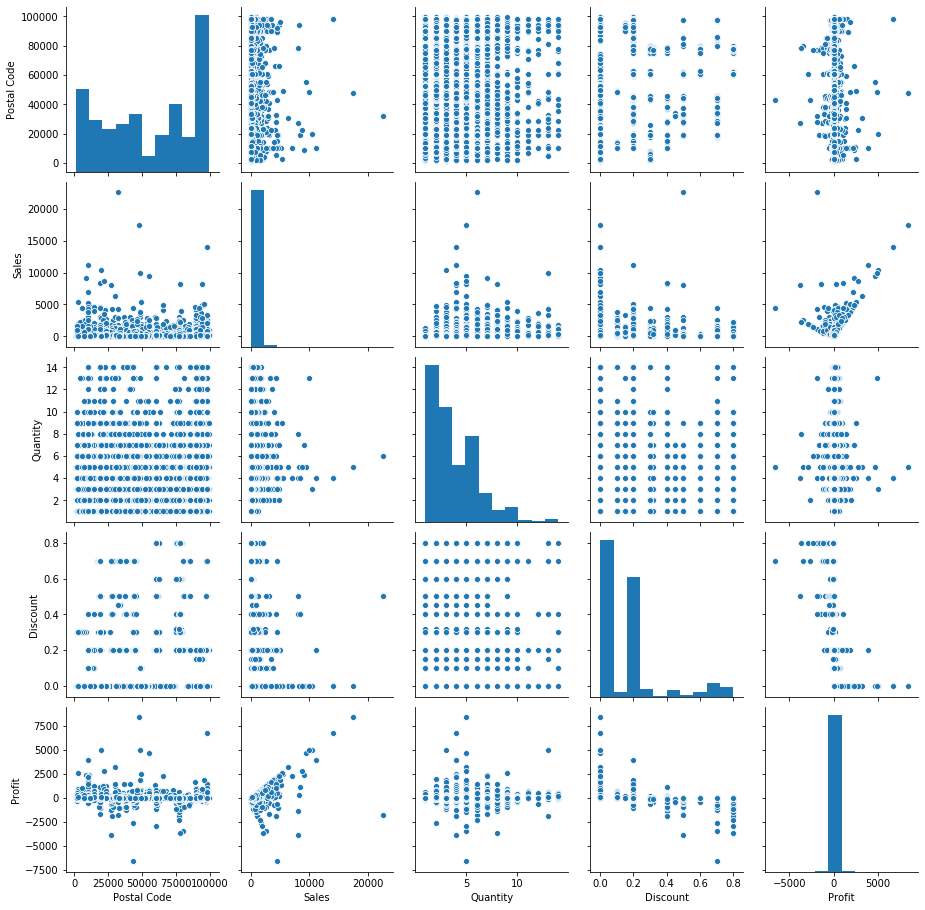

In [15]:
sns.pairplot(mydata.iloc[:,1:])

AxesSubplot(0.726087,0.15;0.173913x0.163043)
AxesSubplot(0.726087,0.15;0.173913x0.163043)
AxesSubplot(0.726087,0.15;0.173913x0.163043)
AxesSubplot(0.726087,0.15;0.173913x0.163043)
AxesSubplot(0.726087,0.15;0.173913x0.163043)


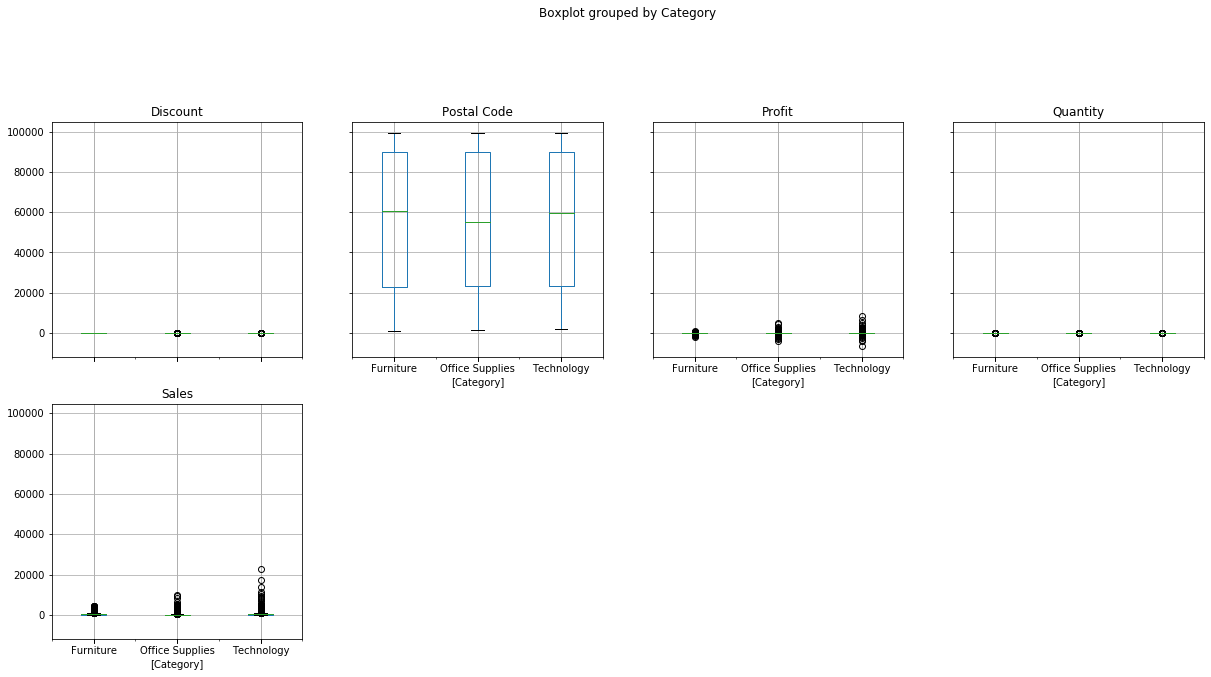

In [17]:
import matplotlib.pyplot as plt
mydata.boxplot(by='Category',layout=(4,4),figsize=(20,20))
print(mydata.boxplot('Sales'))
print(mydata.boxplot('Quantity'))
print(mydata.boxplot('Discount'))
print(mydata.boxplot('Profit'))
print(mydata.boxplot('Postal Code'))

In [19]:
corr=mydata.corr()
corr

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


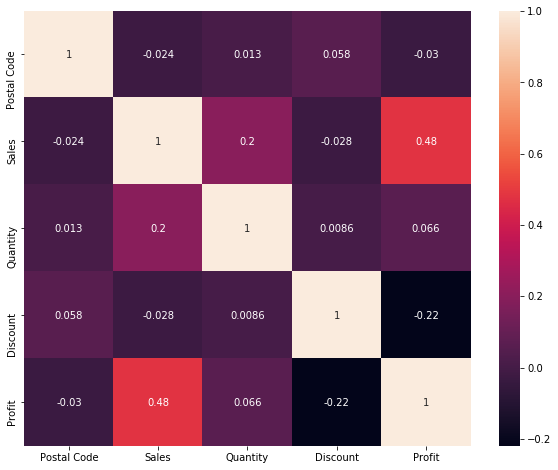

In [20]:
plt.subplots(figsize=(10,8))
sns.heatmap(corr,annot= True)

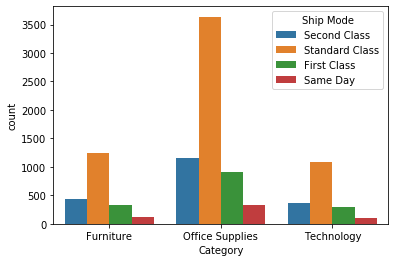

In [21]:
sns.countplot(x='Category',hue='Ship Mode',data=mydata)

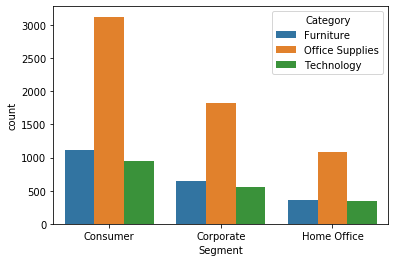

In [22]:
sns.countplot(x='Segment',hue='Category',data=mydata)

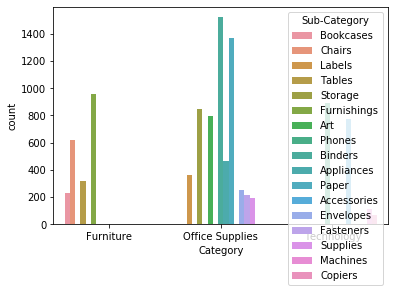

In [23]:
sns.countplot(x='Category',hue='Sub-Category',data=mydata)

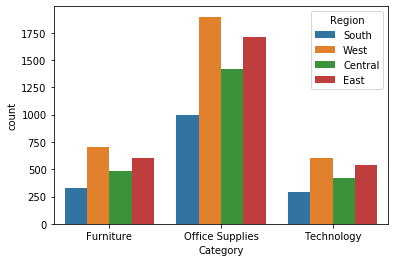

In [24]:
sns.countplot(x='Category',hue='Region',data=mydata)

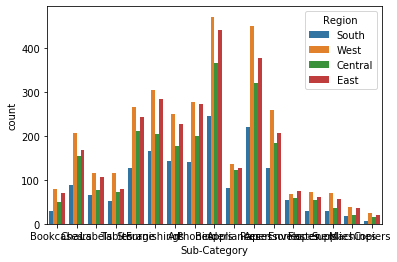

In [25]:
sns.countplot(x='Sub-Category',hue='Region',data=mydata)

### Profit based on Category of Sales

In [27]:
print("unique Category:" , mydata['Category'].unique())

unique Category: ['Furniture' 'Office Supplies' 'Technology']


In [32]:
print("Profit based on Furniture:", mydata[mydata['Category']=='Furniture'].Profit.sum())
print("Profit based on Office Supplies:", mydata[mydata['Category']=='Office Supplies'].Profit.sum())
print("Profit based on Technology:", mydata[mydata['Category']=='Technology'].Profit.sum())

Profit based on Furniture: 18451.272800000006
Profit based on Office Supplies: 122490.8008
Profit based on Technology: 145454.9481


### profit based on Sub-Category

In [34]:
print("unique Sub-Category:" , mydata['Sub-Category'].unique())


unique Sub-Category: ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [63]:
print("Profit by Tables:", mydata[mydata['Sub-Category']=='Tables'].Profit.sum())
print("Profit by Paper:", mydata[mydata['Sub-Category']=='Paper'].Profit.sum())
print("Profit by Accessories:", mydata[mydata['Sub-Category']=='Accessories'].Profit.sum())
print("Profit by Appliances:", mydata[mydata['Sub-Category']=='Appliances'].Profit.sum())





Profit by Tables: -17725.481099999997
Profit by Paper: 34053.5693
Profit by Accessories: 41936.6357
Profit by Appliances: 18138.005400000002


### Profit based on Region

In [42]:
print("unique Region:" , mydata['Region'].unique())


unique Region: ['South' 'West' 'Central' 'East']


In [43]:
print("Profit based on Region:", mydata[mydata['Region']=='South'].Profit.sum())
print("Profit based on Region:", mydata[mydata['Region']=='West'].Profit.sum())
print("Profit based on Region:", mydata[mydata['Region']=='Central'].Profit.sum())
print("Profit based on Region:", mydata[mydata['Region']=='East'].Profit.sum())



Profit based on Region: 46749.4303
Profit based on Region: 108418.4489
Profit based on Region: 39706.3625
Profit based on Region: 91522.78


### Sales based on Region

In [45]:
# sales based on East Region
print("Sales based on Region:", mydata[mydata['Region']=='East'].Sales.sum())


Sales based on Region: 678781.24


### Which Region sales high Quantity 

In [51]:
print("Quantity based on Region EAst:", mydata[mydata['Region']=='East'].Quantity.sum())
print("Quantity based on Region West:", mydata[mydata['Region']=='West'].Quantity.sum())
print("Quantity based on Region Central:", mydata[mydata['Region']=='Central'].Quantity.sum())
print("Quantity based on Region South:", mydata[mydata['Region']=='South'].Quantity.sum())
print("Region west sales high Quantity")



Quantity based on Region EAst: 10618
Quantity based on Region West: 12266
Quantity based on Region Central: 8780
Quantity based on Region South: 6209
Region west sales high Quantity


### Profit Classified by Shipping mode of the SuperStore

In [53]:
mydata['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [56]:
print("Profit by Standard Class:",mydata[mydata['Ship Mode']=='Standard Class'].Profit.sum())
print("Profit by First Class:",mydata[mydata['Ship Mode']=='First Class'].Profit.sum())
print("Profit by Same Day:",mydata[mydata['Ship Mode']=='Same Day'].Profit.sum())

Profit by Standard Class: 164088.7875
Profit by First Class: 48969.8399
Profit by Same Day: 15891.7589


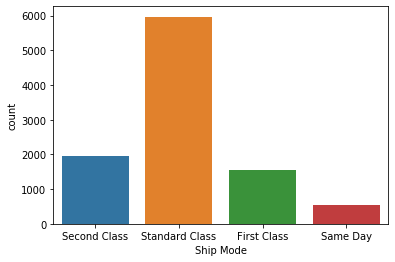

In [58]:
sns.countplot(mydata['Ship Mode'])

### Profit based on different Segment

In [59]:
mydata['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [61]:
print("Profit by Cunsumer:",mydata[mydata['Segment']=='Consumer'].Profit.sum())
print("Profit by Corporate:",mydata[mydata['Segment']=='Corporate'].Profit.sum())
print("Profit by Home Office:",mydata[mydata['Segment']=='Home Office'].Profit.sum())


Profit by Cunsumer: 134119.2092
Profit by Corporate: 91979.13399999999
Profit by Home Office: 60298.678499999995


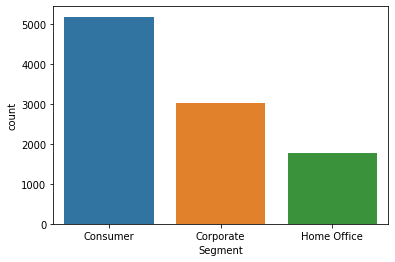

In [62]:
sns.countplot(mydata['Segment'])

## Conclusion:
## 1: Profit by furniture very low.have to tackel it
## 2:There is no profit on tables.
## 3.profit made by office supplie is normal. here we can increase sales by using recommended engine
